In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 

### Newton-Raphson

Siguiente término por derivada


In [38]:
x = sp.symbols('x')


def newtonRaphson(f,a,b, tolerancia, precision, max_iter, inicio,df=None):
   
    if df == None:
        df = sp.lambdify(x, sp.diff(f(x),x), "numpy")           
    c = inicio
    cnt = 1
    no_encontrado = True
    salida = "max_iter"
    while cnt < max_iter and no_encontrado : 
        
        cs = c - f(c)/df(c)
        
        if abs(f(cs)) < precision: 
            salida = "precision"
            no_encontrado = False
        if abs(cs-c) < tolerancia:
            salida = "tolerancia"
            no_encontrado = False
        else: 
            c = cs 
            cnt +=1
            
    return cs , salida, cnt


def newtonRaphsonSinInicio(f,a,b, tolerancia, precision, max_iter):
    # Calculamos derivadas
    df = sp.lambdify(x, sp.diff(f(x),x), "numpy")
    ddf = sp.lambdify(x,sp.diff(df(x),x),"numpy")
    
    #calculamos punto inicial 
    if f(a)*ddf(a) > 0 : 
        c = a
    else :
        c = b
    
   
    return newtonRaphson(f,a,b, tolerancia, precision, max_iter, c)



3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con precisión $10^{-5}$ , partiendo de
un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10 cos x+x=0$.


In [39]:
prec=tol = 10^(-7)

#intervalo inferior 
a=[1,-1,-1]
b = [2,0, 1]
a = 1
b = 2

def f(x) : return x**3 - x - 1
# Comprobamos que en este intervalo se puede aplicar esta función 
print(f'a={a}, f(a)={f(a)}, b={b}, f(b)={f(b)}')
#f =[(lambda x: x**3 - x - 1) , (lambda x: 2 + x**2 - np.exp(x)-2*x), (lambda x: x**2 + 10*sp.cos(x)+x) ]

newtonRaphsonSinInicio( f, a,b,tol,prec,50)


a=1, f(a)=-1, b=2, f(b)=5


(1.324717957244746, 'max_iter', 50)

ii) $3x=2+x^2-e^x$.

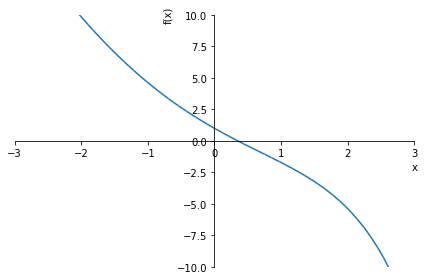

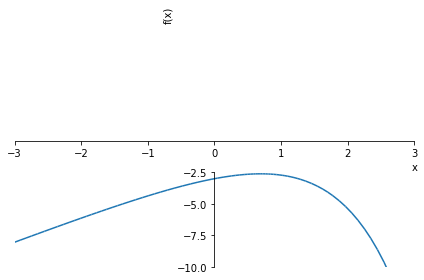

In [47]:
# Sacamos intervalo encontrando mínimo 
def f(y) : return (2 + y**2 - sp.exp(y)-2*y)
# derivadas
sp.diff(f(x),x)
sp.plot(f(x),(x,-3,3), ylim= [-10.0, 10.0])
# Como podemos apreciar la función es decrecien en este intervalo
sp.plot(sp.diff(f(x),x),(x,-3,3), ylim= [-10.0, 10.0])

# por tanto voy  a tomar como intervalo: 
a = -1
b = 1

In [48]:
sp.diff(f(x),x)

2*x - exp(x) - 2

In [57]:
prec=tol = 10^(-6)
# Comprobamos que en este intervalo se puede aplicar esta función 
print(f'a={a}, f(a)={f(a).evalf()}, b={b}, f(b)={f(b).evalf()}')
# Perfecto, función continua y cambio de signo

def fnp(y) : return (2 + y**2 - np.exp(y)-2*y)
r =newtonRaphson( fnp, a,b,tol,prec,50,b, lambda y:2*y-np.exp(y)-2)
r

a=-1, f(a)=4.63212055882856, b=1, f(b)=-1.71828182845905


(0.3512625335229046, 'max_iter', 50)

In [55]:
#comprobrobación 
fnp(r[0])


-2.220446049250313e-16